In [201]:
# import libraries that we use throughout the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import and get to know about data

In [202]:
# import data set
data = pd.read_csv('heart.csv')

In [203]:
# get to know the data
data.head()   # first 5 records

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [204]:
data.tail()   #last 5 records

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [205]:
data.shape

(1025, 14)

In [206]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [243]:
#no of heart patients and no of healthy patients
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [244]:
#no of male and females
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

# data cleaning

1- check data type

In [208]:
# count no of unique value for each feature
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [209]:
# data type for each feature
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

2- identifies the mistakes

In [210]:
# unique values for 'ca' feature
data['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [211]:
# count the number for each value
data['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [212]:
# we found that '4' is the incoreect value 
# now find the row in which ca has 4 value
data.loc[(data['ca'] == 4)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
340,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
417,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [213]:
# replce the value '4' in 'ca' col with nan
data.loc[(data['ca'] == 4),'ca'] = np.nan

In [214]:
# verify the replacement
data['ca'].unique()

array([ 2.,  0.,  1.,  3., nan])

In [215]:
# unique values for 'thal' feature
data['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [216]:
# count the number for each value
data['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [217]:
# we found that '0' is the incoreect value 
# now find the row in which thal has 0 value
data.loc[(data['thal'] == 0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
319,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
329,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
686,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
734,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
893,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [218]:
# replce the value '0' in 'thal' col with nan
data.loc[(data['thal'] == 0),'thal'] = np.nan

In [219]:
# verify the replacement
data['thal'].unique()

array([ 3.,  2.,  1., nan])

3- identify and remove null values

In [220]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64

<AxesSubplot:>

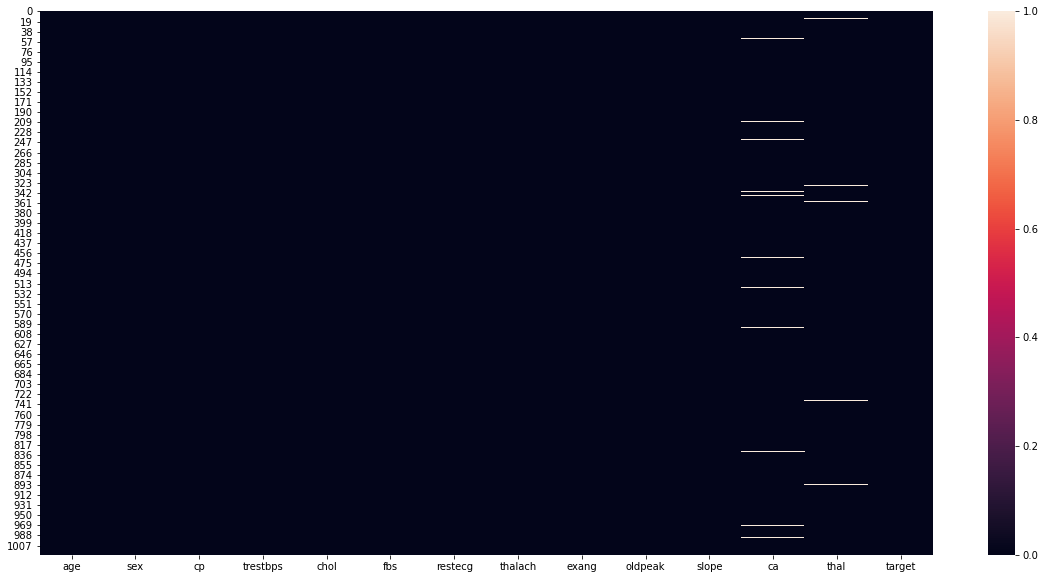

In [221]:
# visualize null value
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())  # heat bar on null values

In [222]:
# perform OneHotEncoding ie replace null value with mean value of respective col

# here we have 2 col having null value ie ca and thal
# perform OneHotEncoding for both col

data['ca'].replace(to_replace=np.nan,value=int(data['ca'].mean()) ,inplace=True)
data['thal'].replace(to_replace=np.nan,value=int(data['thal'].mean()) ,inplace=True)


In [223]:
# verify replacement
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

4- find and remove duplicates values

In [224]:
# sum of duplicate values
data.duplicated().sum()

723

In [225]:
# row having duplicate values
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0.0,2.0,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0.0,2.0,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0.0,3.0,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0.0,3.0,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0.0,2.0,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1.0,3.0,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1.0,2.0,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0.0,2.0,1


In [226]:
# drop duplicate values
data.drop_duplicates(inplace = True)

In [227]:
#verfy the result
data.duplicated().sum()


0

In [228]:
# data without duplication
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0.0,2.0,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0.0,2.0,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1.0,3.0,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0.0,2.0,0


5- get statestical summary of data


In [229]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,2.327815,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


# data visualization

In [230]:
#replace values for better visualization

data["target"]=data.target.replace({1:"Dignose",0:"Not Dianose"})
data["sex"]=data.sex.replace({1:"male",0:"Female"})
data["cp"]=data.cp.replace({0: "typical_angina", 1: "atypical_angina", 2:"non-anginal pain",3: "asymtomatic"})
data["fbs"]=data.fbs.replace({1:"Yes",0:"No"})


Text(0.5, 1.0, 'age distribution')

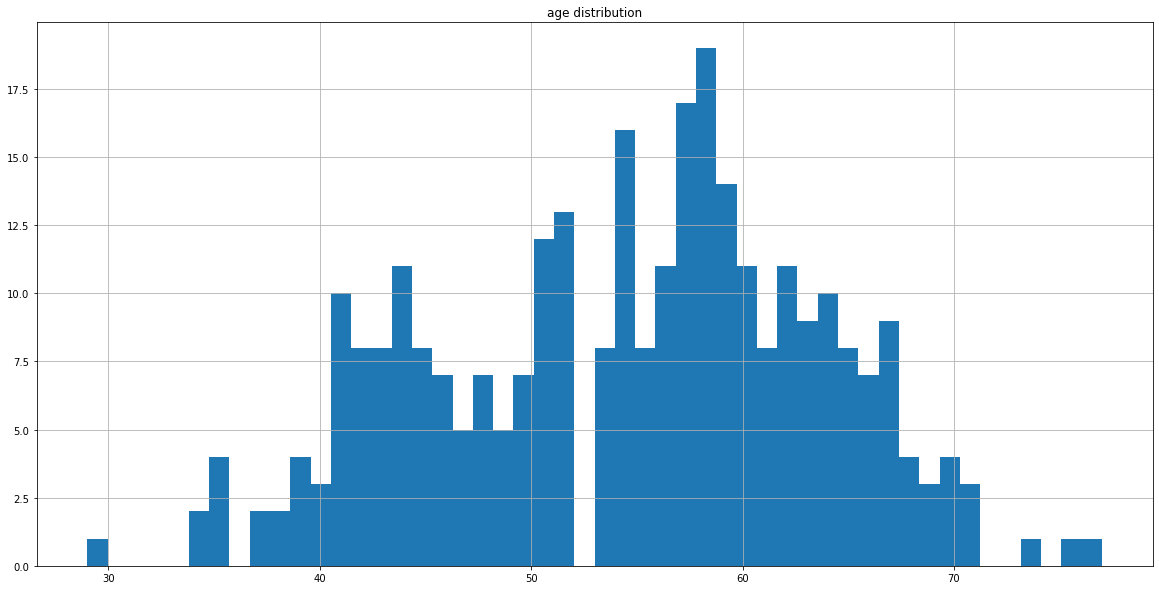

In [231]:
#visualize age distribution
plt.figure(figsize=(20,10))
data['age'].hist(bins=50)
plt.title("age distribution")

Text(0.5, 1.0, 'Target Dsitribtion')

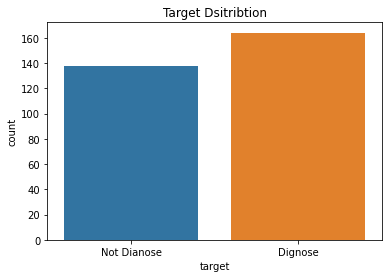

In [232]:
#visualize target distribution
sns.countplot(x="target",data=data)
plt.title('Target Dsitribtion')

Text(0.5, 1.0, 'sex Distribtion')

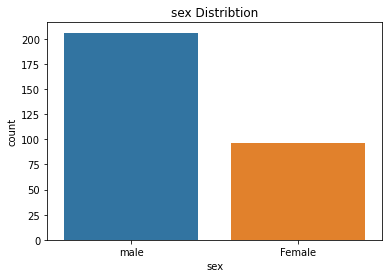

In [233]:
#visualize sex distribution

sns.countplot(x="sex",data=data)
plt.title('sex Distribtion')

Text(0.5, 1.0, 'Distribution of target According to Sex')

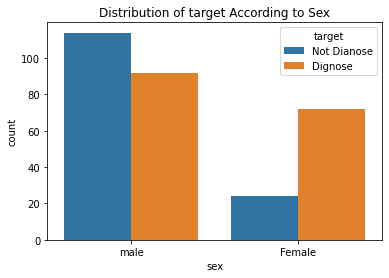

In [234]:
sns.countplot(x="sex",hue="target",data=data)
plt.title('Distribution of target According to Sex')

Text(0.5, 1.0, 'Distribtion of target According to Age')

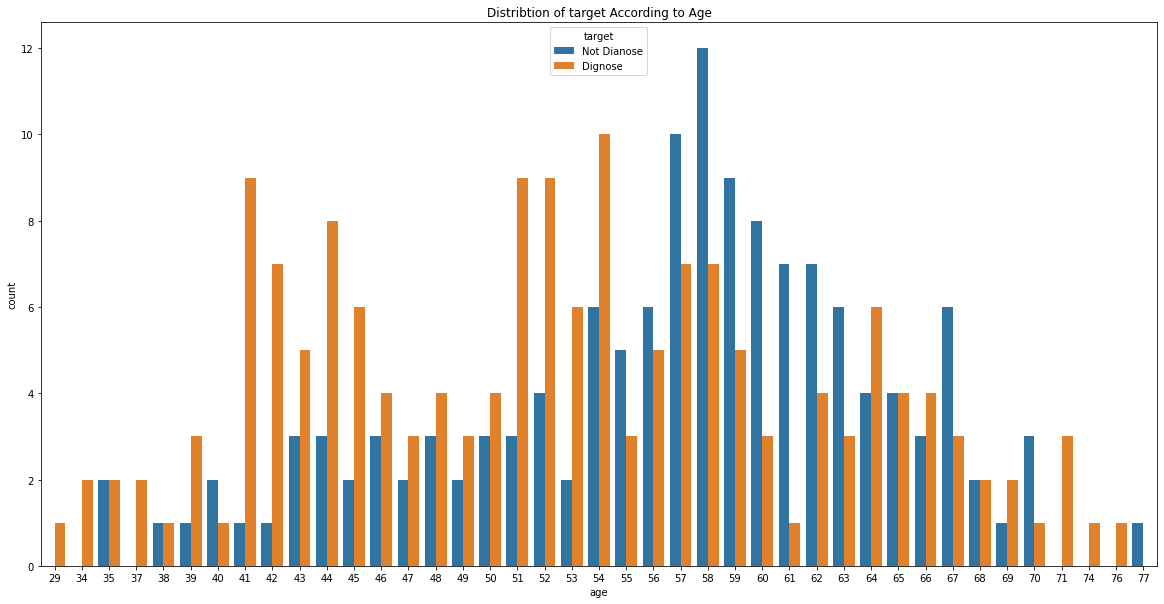

In [235]:
plt.figure(figsize=(20,10))
sns.countplot(x="age",hue="target",data=data)
plt.title("Distribtion of target According to Age")

Text(0.5, 1.0, 'distribtuin according to chest pain')

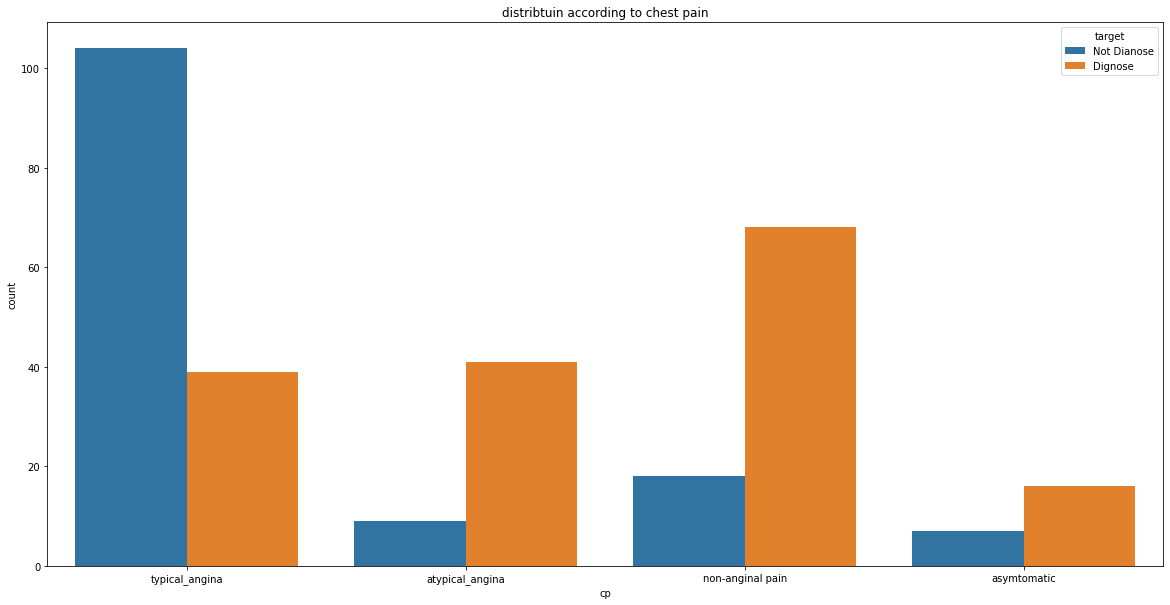

In [236]:
plt.figure(figsize=(20,10))
a=sns.countplot(x="cp",hue="target",data=data)
a.set_title("distribtuin according to chest pain")

Text(0.5, 1.0, 'distribtuin according Fast Blood Sugar')

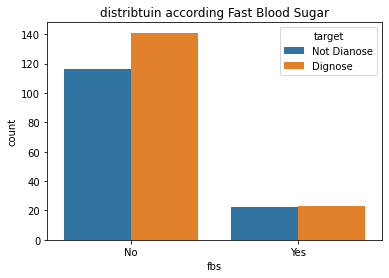

In [237]:
a=sns.countplot(x="fbs",hue="target",data=data)
a.set_title("distribtuin according Fast Blood Sugar")

In [238]:
#re-replace values for applying enumerate

data["target"]=data.target.replace({"Dignose":1,"Not Dianose":0})
data["sex"]=data.sex.replace({"male":1,"Female":0})
data["cp"]=data.cp.replace({"typical_angina":0,"atypical_angina":1,"non-anginal pain":2,"asymtomatic":3})
data["fbs"]=data.fbs.replace({"Yes":1,"No":0})

In [239]:
#extract features
features=list(data.columns)
print(features)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [240]:
# remove target from features
features.remove('target')

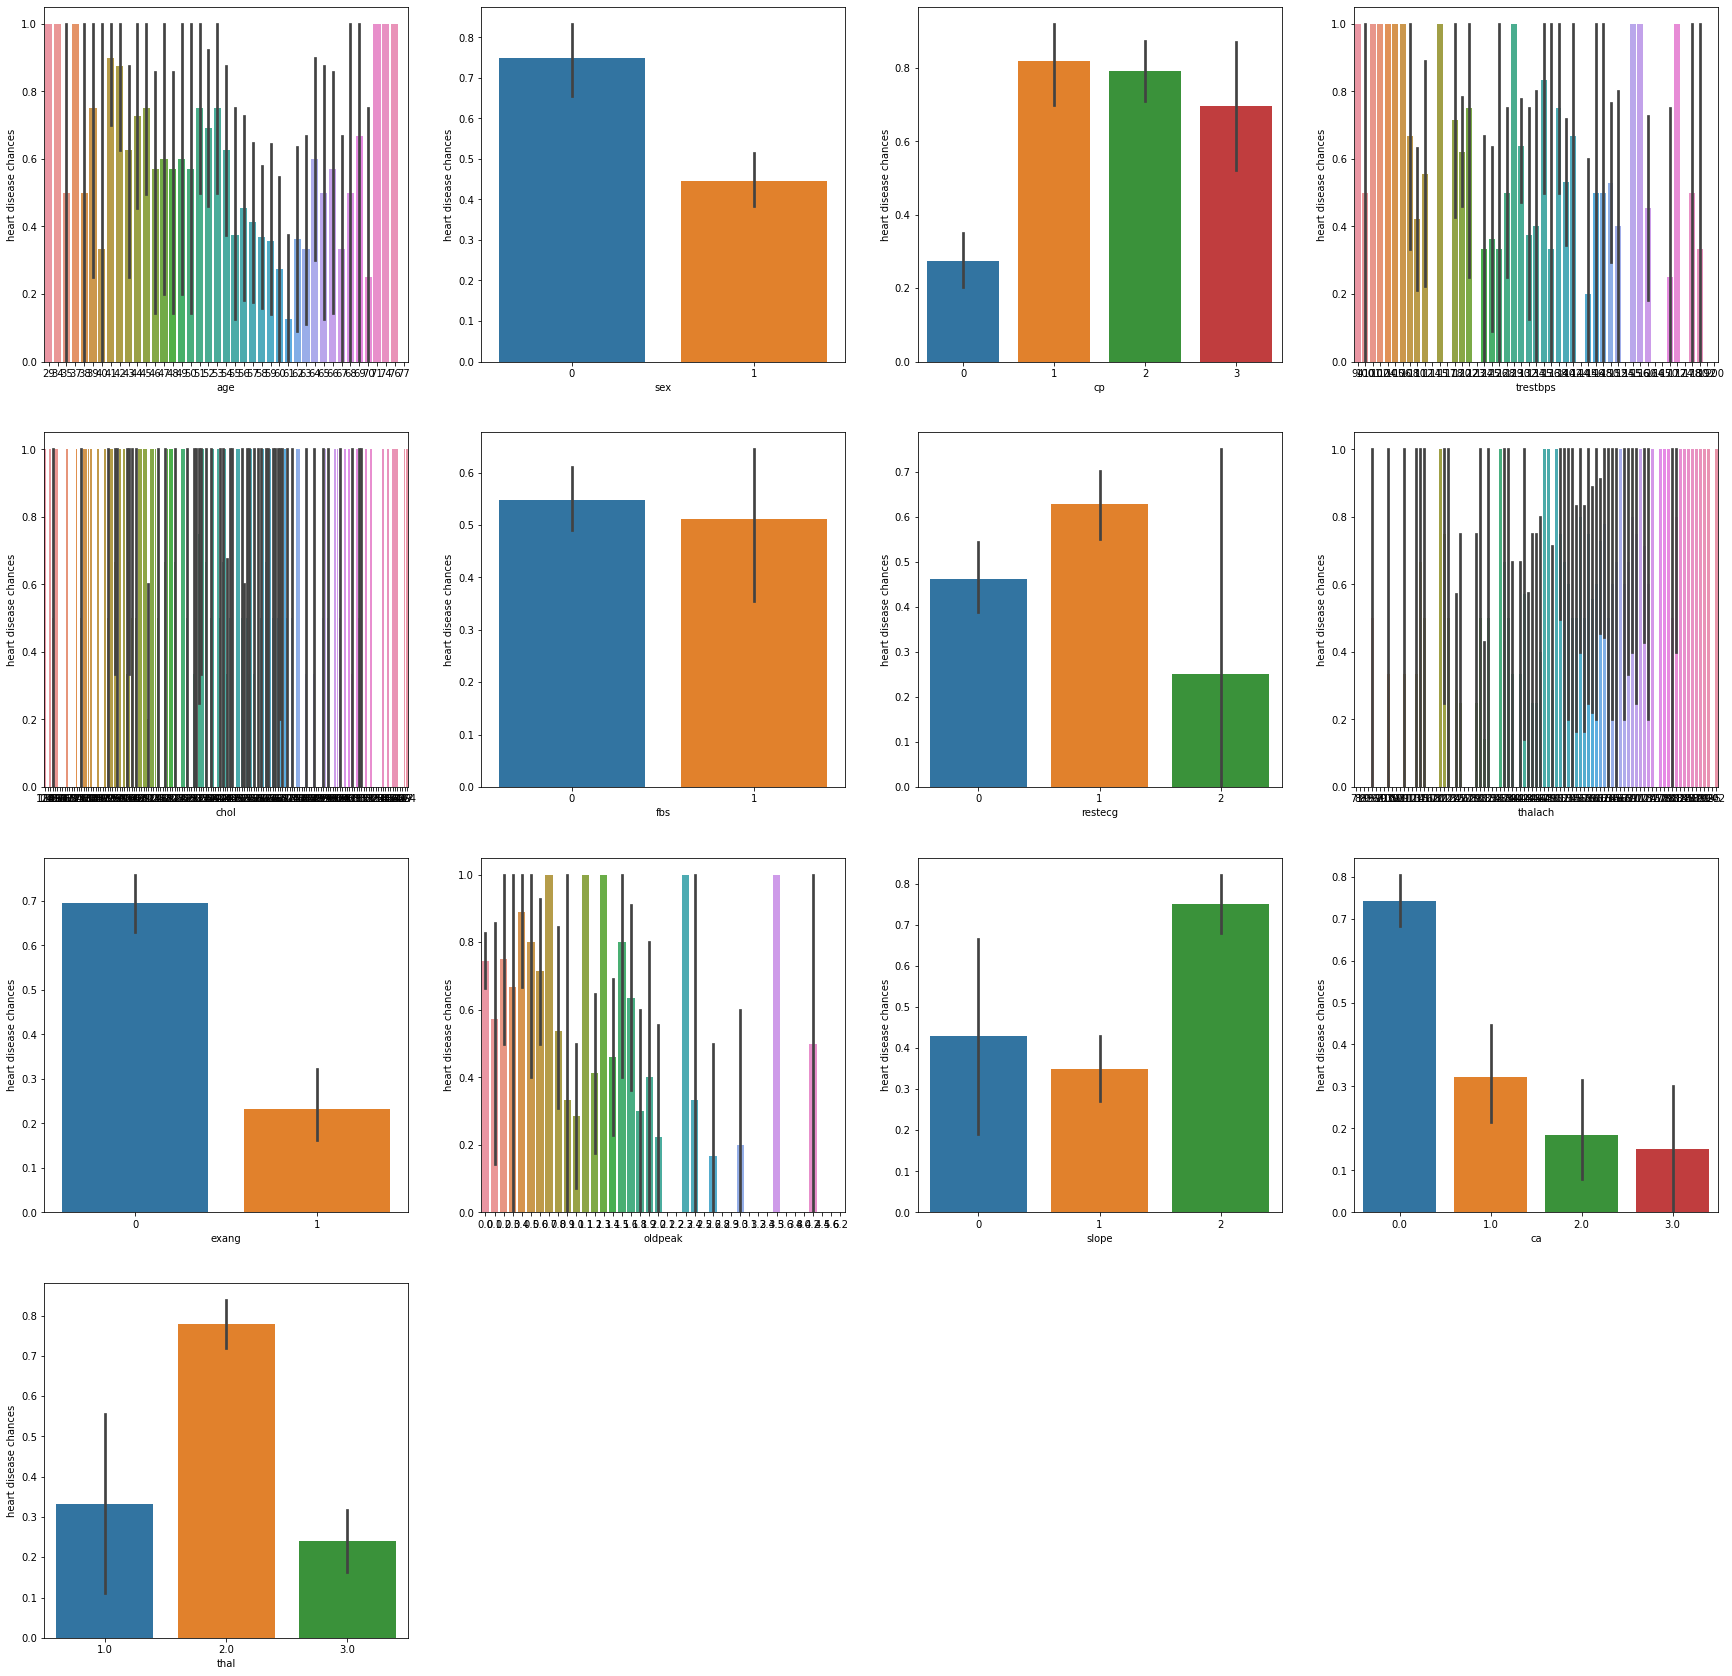

In [241]:
plt.figure(figsize=(30,30))
for i , col in enumerate(features,1):
    plt.subplot(4,4,i)
    sns.barplot(x=f"{col}",y="target",data=data)
    plt.xlabel(f"{col}")
    plt.ylabel('heart disease chances')